In [1]:
import random
import math
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pickle

## Tic-Tac-Toe engine

In [2]:
from libs.TicTacToe import TicTacToe

In [3]:
state = np.array([0., 0., -1., -1., 1., -1., 1., 1., 0.])
TicTacToe().get_available_actions(state)

array([1., 1., 0., 0., 0., 0., 0., 0., 1.])

In [4]:
ttt = TicTacToe()

while ttt.status=="Ongoing":

    valid_moves = ttt.next_moves()
    new_board = random.choice(valid_moves)
    ttt.play(new_board)
    print(np.reshape(ttt.board, (3,3)),"\n")
    if len(valid_moves)==0:
        break

print("[Winner]:",ttt.winner)

[[0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]] 

[[ 0.  0.  0.]
 [ 0. -1.  0.]
 [ 1.  0.  0.]] 

[[ 0.  0.  0.]
 [ 0. -1.  0.]
 [ 1.  1.  0.]] 

[[-1.  0.  0.]
 [ 0. -1.  0.]
 [ 1.  1.  0.]] 

[[-1.  1.  0.]
 [ 0. -1.  0.]
 [ 1.  1.  0.]] 

[[-1.  1.  0.]
 [-1. -1.  0.]
 [ 1.  1.  0.]] 

[[-1.  1.  0.]
 [-1. -1.  0.]
 [ 1.  1.  1.]] 

[Winner]: 1


## Create policy and probability model

In [5]:
from libs.model import create_model

In [6]:
model = create_model()

In [7]:
model.summary()

Model: "tictactoe_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 9)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 256)          2560        ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 256)          65792       ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 256)          65792       ['dense_1[0][0]']                
                                                                                    

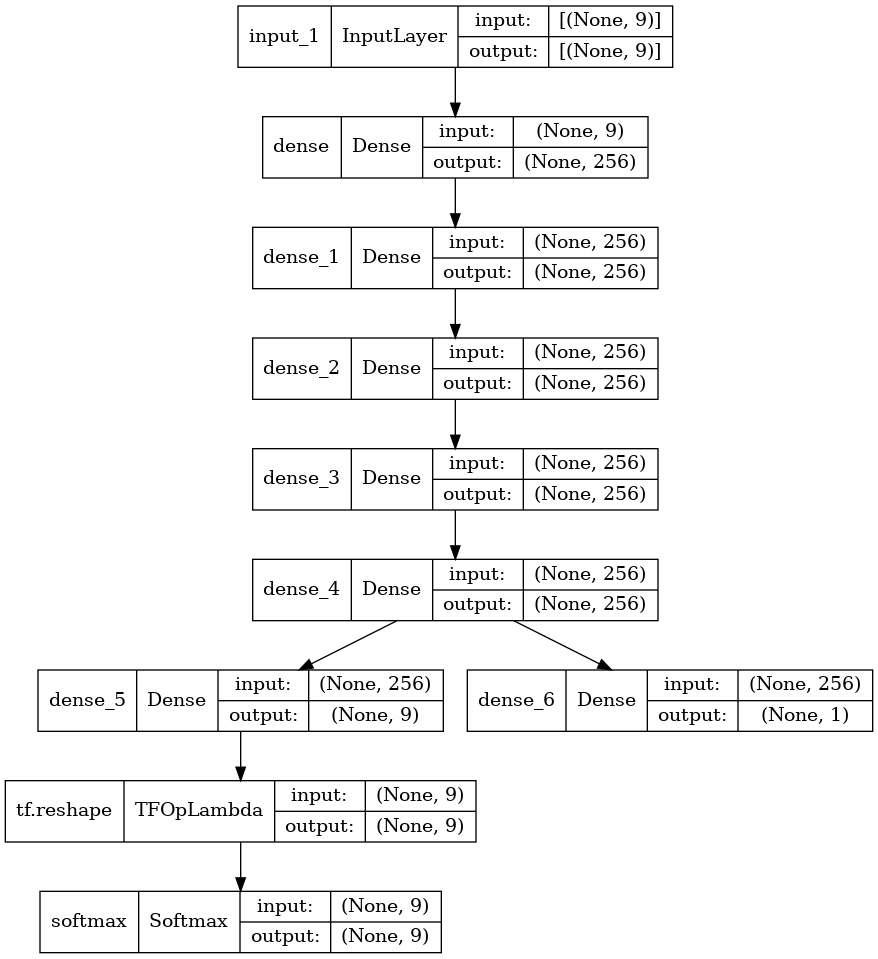

In [8]:
tf.keras.utils.plot_model(model, show_shapes=True)

# Monte Carlo Tree Search

In [9]:
from libs.MCTS import MCTS

In [10]:
mcts = MCTS(game=TicTacToe(), n_simulations=100)

In [11]:
state = np.array([0., 0., -1., -1., 1., -1., 1., 1., 0.])

In [12]:
root = mcts.run(model=model, state=state, player=1)

In [13]:
root

State:
[ 0.  0. -1. -1.  1. -1.  1.  1.  0.]
Player:1
Value:0.96
Leaf:False
Visits:100
Children:
 -0: prior=0.3333333333333333
 -1: prior=0.3333333333333333
 -8: prior=0.3333333333333333

In [14]:
state = np.array([0., 0., -1., -1., 1., -1., 0., 1., 0.])
root = mcts.run(model=model, state=state, player=-1)

In [15]:
root

State:
[-0. -0.  1.  1. -1.  1. -0. -1. -0.]
Player:-1
Value:0.94
Leaf:False
Visits:100
Children:
 -0: prior=0.25
 -1: prior=0.25
 -6: prior=0.25
 -8: prior=0.25

In [16]:
root.children

{0: State:
 [-1. -0.  1.  1. -1.  1. -0. -1. -0.]
 Player:1
 Value:0.0
 Leaf:False
 Visits:2
 Children:
  -1: prior=0.3333333333333333
  -6: prior=0.3333333333333333
  -8: prior=0.3333333333333333,
 1: State:
 [-0. -1.  1.  1. -1.  1. -0. -1. -0.]
 Player:1
 Value:-1.0
 Leaf:True
 Visits:94
 Children:,
 6: State:
 [-0. -0.  1.  1. -1.  1. -1. -1. -0.]
 Player:1
 Value:0.0
 Leaf:False
 Visits:2
 Children:
  -0: prior=0.3333333333333333
  -1: prior=0.3333333333333333
  -8: prior=0.3333333333333333,
 8: State:
 [-0. -0.  1.  1. -1.  1. -0. -1. -1.]
 Player:1
 Value:0.0
 Leaf:False
 Visits:2
 Children:
  -0: prior=0.3333333333333333
  -1: prior=0.3333333333333333
  -6: prior=0.3333333333333333}

# Training

In [17]:
from libs.Trainer import Trainer

In [18]:
trainer = Trainer(game = TicTacToe, mcts = MCTS, model=create_model())

In [ ]:
trainer.train(n_epochs=100, n_games_per_epoch=10, learning_rate=0.1, l2_weight=1e-4)

Epoch 1, loss=2.859724521636963, l2=0.0, p=0.03045220859348774, v=0.6625000238418579, T=1.0
Epoch 2, loss=3.0562868118286133, l2=0.049996089190244675, p=0.02416093647480011, v=0.8570609092712402, T=0.99
Epoch 3, loss=2.8474814891815186, l2=0.08818569779396057, p=0.03025815822184086, v=0.6405986547470093, T=0.98
Epoch 4, loss=2.8251943588256836, l2=0.08828944712877274, p=0.0300765223801136, v=0.6293498277664185, T=0.97
Epoch 5, loss=2.7096314430236816, l2=0.10662229359149933, p=0.029376251623034477, v=0.5054798126220703, T=0.96
Epoch 6, loss=2.707193374633789, l2=0.10744359344244003, p=0.03371308743953705, v=0.4930609166622162, T=0.95
Epoch 7, loss=2.7222847938537598, l2=0.09629572182893753, p=0.03159920498728752, v=0.5287506580352783, T=0.94
Epoch 8, loss=2.9434664249420166, l2=0.09805479645729065, p=0.03207138925790787, v=0.7475459575653076, T=0.9299999999999999
Epoch 9, loss=2.9355125427246094, l2=0.11099036037921906, p=0.03081207163631916, v=0.7374271750450134, T=0.92
Epoch 10, loss

In [ ]:
dataset = Trainer().create_dataset(number_of_games=3)

In [ ]:
boards, estimated_pis, estimated_vs = list(zip(*dataset))

In [ ]:
tf.constant(estimated_vs)

In [ ]:
tf.concat([p[np.newaxis,:] for p in estimated_pis], axis=0)

In [ ]:
test_ps, test_v = model(tf.concat([b[np.newaxis,:] for b in boards], axis=0))

In [ ]:
test_ps * tf.math.log(test_ps)